In [2]:
from sklearn.compose import TransformedTargetRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import set_config
set_config(display='diagram')

In [3]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


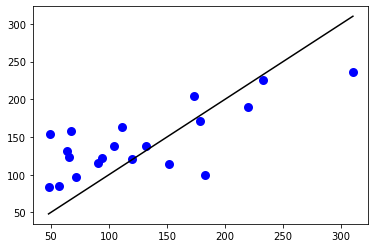

In [20]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.plot([diabetes_y_test.min(),diabetes_y_test.max()], [diabetes_y_test.min(),diabetes_y_test.max()],  color='black')
plt.scatter(diabetes_y_test, diabetes_y_pred, color='blue', linewidth=3)

plt.show()

Mean squared error: 2209.29
Coefficient of determination: 0.54


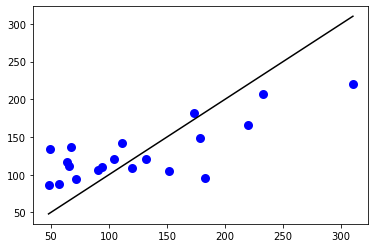

In [27]:
regr_trans = TransformedTargetRegressor(regressor=linear_model.RidgeCV(),
                                        func=np.log1p,
                                        inverse_func=np.expm1)
regr_trans.fit(diabetes_X_train, diabetes_y_train)
y_pred = regr_trans.predict(diabetes_X_test)
# The coefficients
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, y_pred))

# Plot outputs
plt.plot([diabetes_y_test.min(),diabetes_y_test.max()], [diabetes_y_test.min(),diabetes_y_test.max()],  color='black')
plt.scatter(diabetes_y_test, y_pred, color='blue', linewidth=3)
plt.show()